## Importing packages and dataset

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import axes3d
plt.style.use('ggplot')
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score, pairwise_distances
import scipy.cluster.hierarchy as sch
import scipy.stats as stats

In [2]:
np.random.seed(16)
# importing dataset

df = pd.read_csv("../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# making dataframe of numerical variables
nv = df.iloc[:,[2,3,4]]

# basic descriptive statistics
nv.describe().round(2)

,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00
mean,38.85,60.56,50.20
std,13.97,26.26,25.82
min,18.00,15.00,1.00
25%,28.75,41.50,34.75
50%,36.00,61.50,50.00
75%,49.00,78.00,73.00
max,70.00,137.00,99.00


## Boxplots of numerical variables

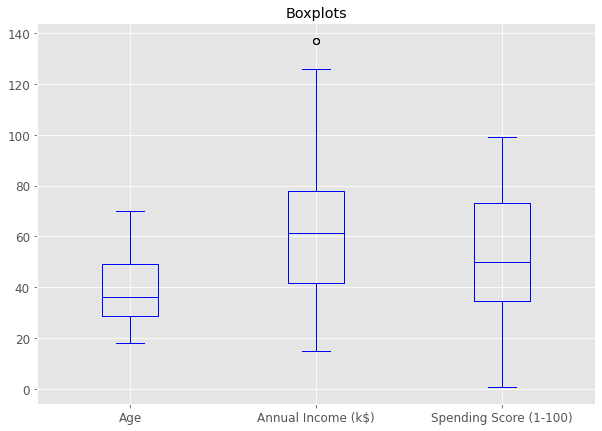

In [4]:
fig, ax = plt.subplots(figsize = (10,7))

nv.boxplot(fontsize = 12, color = "blue")

ax.set(title = "Boxplots");

We can see that there is a potentional outlier that is out of the box for our varibale *Annual income (k$)*.

## Data visualisation

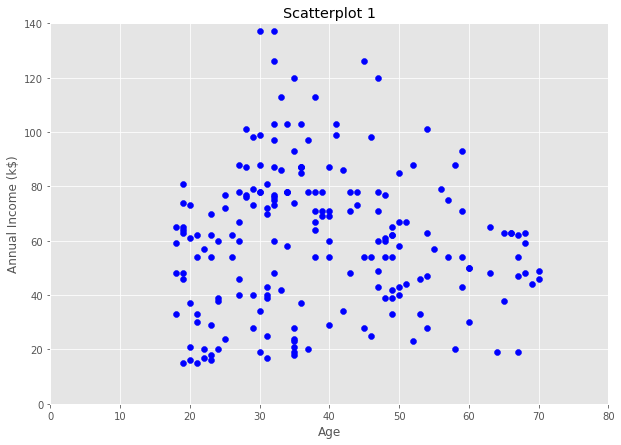

In [5]:
fig, ax = plt.subplots(figsize=(10,7))

ax.scatter(df["Age"], df["Annual Income (k$)"], c = "blue")

ax.set(title = "Scatterplot 1", xlabel = "Age", ylabel = "Annual Income (k$)");

ax.set_xlim(0,80)
ax.set_ylim(0,140);

From this scatterplot with variables *Age* and *Annual Income(k$)* we can't really notice any potentional clusters that differ significantly

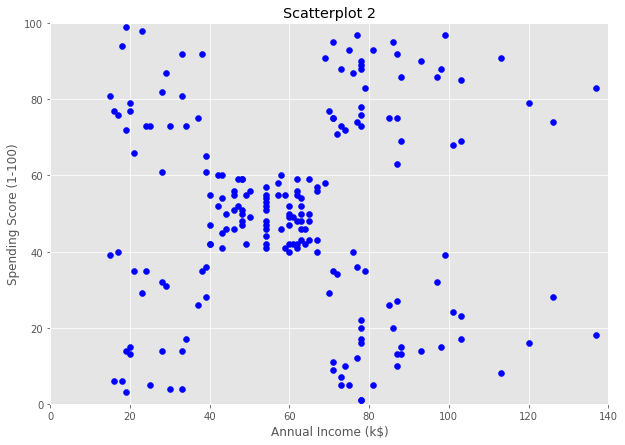

In [6]:
fig, ax = plt.subplots(figsize = (10,7))

ax.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c = "blue")

ax.set(title = "Scatterplot 2", xlabel = "Annual Income (k$)", ylabel = "Spending Score (1-100)");

ax.set_xlim(0,140)
ax.set_ylim(0,100);

From this scatterplot with variables *Age* and *Spending score(1-100)* we can notice about 5 potentional clusters:
1. cluster with high spending score and low annual income
2. cluster with high spending score and high annual income
3. cluster with mid range spending score and mid range income
4. cluster with low spending score and low annual income
5. cluster with low spending score and high annual income

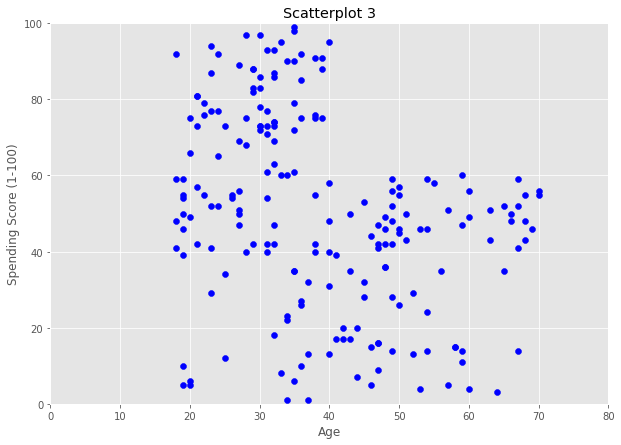

In [7]:
fig, ax = plt.subplots(figsize = (10,7))

ax.scatter(df["Age"],df["Spending Score (1-100)"], c = "blue")

ax.set(title = "Scatterplot 3", xlabel = "Age", ylabel = "Spending Score (1-100)");

ax.set_xlim(0,80)
ax.set_ylim(0,100);

From this scatterplot with variables *Age* and *Spending score(1-100)* we can notice about 3 potentional clusters:
1. cluster with younger customers and higher spending score
2. cluster with older customers and mid range spending score
3. cluster with older customers and low spending score

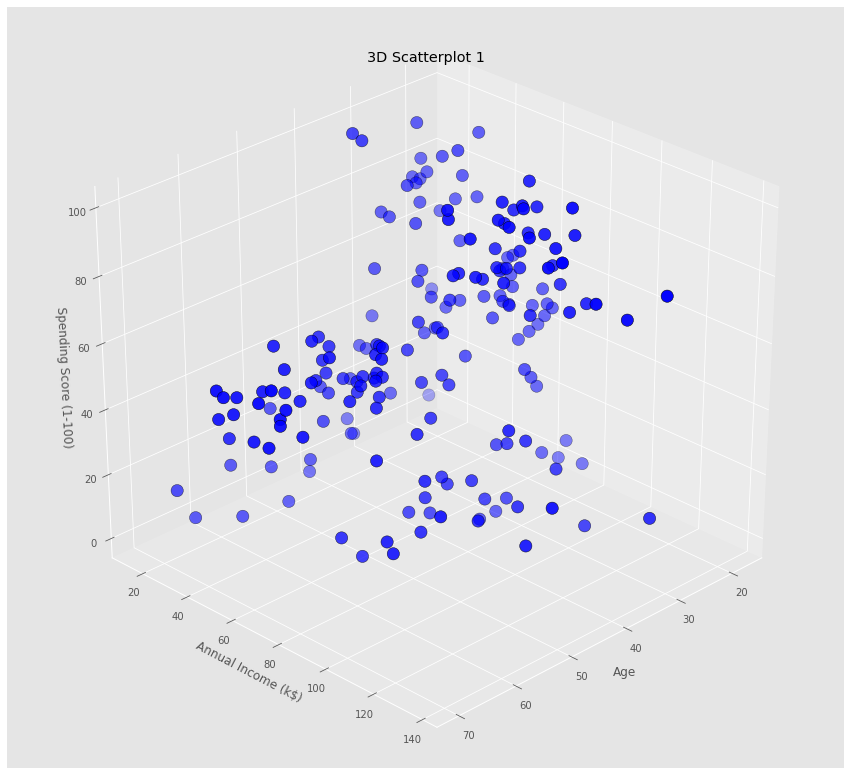

In [8]:
fig = plt.figure(figsize = (15,14))
ax = fig.add_subplot(111, projection='3d')

ax.set(title = "3D Scatterplot 1", xlabel = "Age", ylabel = "Annual Income (k$)", zlabel = "Spending Score (1-100)")

x = nv["Age"]
y = nv["Annual Income (k$)"]
z = nv["Spending Score (1-100)"]

ax.scatter(x,y,z, marker="o", c = "blue", s=150, edgecolors= "black");

ax.view_init(30, 45)

## Standardization and outliers

Performing standardization of numerical variables

In [9]:
scaler = StandardScaler().fit(nv)
std = scaler.transform(nv)

df_std = pd.DataFrame(std)

df_std.rename(columns = {0:"Std Age", 
                         1:"Std Annual Income (k$)", 
                         2: "Std Spending Score (1-100)"}, inplace = True)

df_2 = pd.concat([df,df_std], axis = 1)
df_2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Std Age,Std Annual Income (k$),Std Spending Score (1-100)
0,1,Male,19,15,39,-1.424569,-1.738999,-0.434801
1,2,Male,21,15,81,-1.281035,-1.738999,1.195704
2,3,Female,20,16,6,-1.352802,-1.700830,-1.715913
3,4,Female,23,16,77,-1.137502,-1.700830,1.040418
4,5,Female,31,17,40,-0.563369,-1.662660,-0.395980


#### Outliers
When i made boxplots of out variables, we saw that we had one potentional outlier for our variable *Annual Inocme*. We can now see if there is an outlier by looking at standardized values of our variables. If we see data point that goes above value of absolute 3, then we know that it is outlier. We can now find min and max of our varibale *Std Annual Income (k$)* and see if there is outlier.

In [10]:
df_std["Std Annual Income (k$)"].min() , df_std["Std Annual Income (k$)"].max()

(-1.7389991930659485, 2.9176711658902788)

We see that min and max values are below the absolute 3 and we conclude we don't have outliers.

## Elbow method

In [11]:
wcss = []

for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit(df_std)
    wcss.append(km.inertia_)
    
df_wcss = pd.DataFrame(wcss).rename(columns = {0:"WCSS"})
df_wcss["Number of Clusters"] = pd.DataFrame([i for i in range(1,10)])
df_wcss["Change %"] = df_wcss["WCSS"].pct_change()
df_wcss = df_wcss[["Number of Clusters", "WCSS", "Change %"]].round(4)
df_wcss

,Number of Clusters,WCSS,Change %
0,1,600.0000,NaN
1,2,389.3862,-0.3510
2,3,295.2122,-0.2419
3,4,205.2251,-0.3048
4,5,168.2476,-0.1802
5,6,133.8889,-0.2042
6,7,117.0116,-0.1261
7,8,103.9442,-0.1117
8,9,92.3495,-0.1115


From dataframe we can see that the biggest diffrences are between 4th and 5th cluster, then 2nd and 3rd. It is hard to say which should we take as optimal cluster number. I decided for number 4. Also in the next line we can se a graphical representation of it.

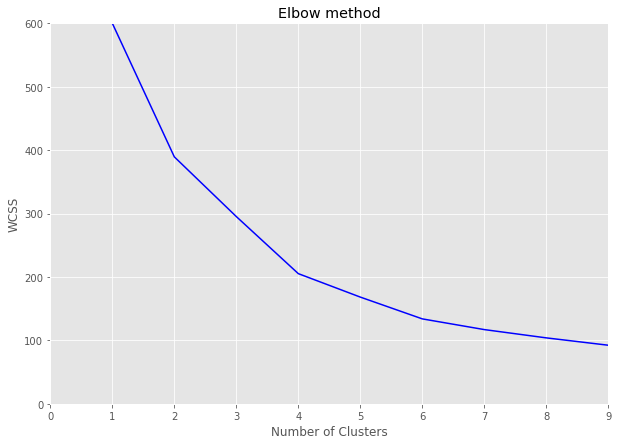

In [12]:
fig, ax = plt.subplots(figsize = (10,7))

ax.plot(df_wcss["Number of Clusters"], wcss, c = "blue")

ax.set(title= "Elbow method", ylabel = "WCSS", xlabel = "Number of Clusters")

ax.set_xlim(0,9)
ax.set_ylim(0,600);

## Silhouette analysis

For n  number of clusters = 2 Average silhouette score is:  0.33547192894004574
For n  number of clusters = 3 Average silhouette score is:  0.35880977401117803
For n  number of clusters = 4 Average silhouette score is:  0.4039582785148566
For n  number of clusters = 5 Average silhouette score is:  0.41664341513732767
For n  number of clusters = 6 Average silhouette score is:  0.42742814991580175
For n  number of clusters = 7 Average silhouette score is:  0.4188056949620008
For n  number of clusters = 8 Average silhouette score is:  0.40694842797445224
For n  number of clusters = 9 Average silhouette score is:  0.4207420987392564


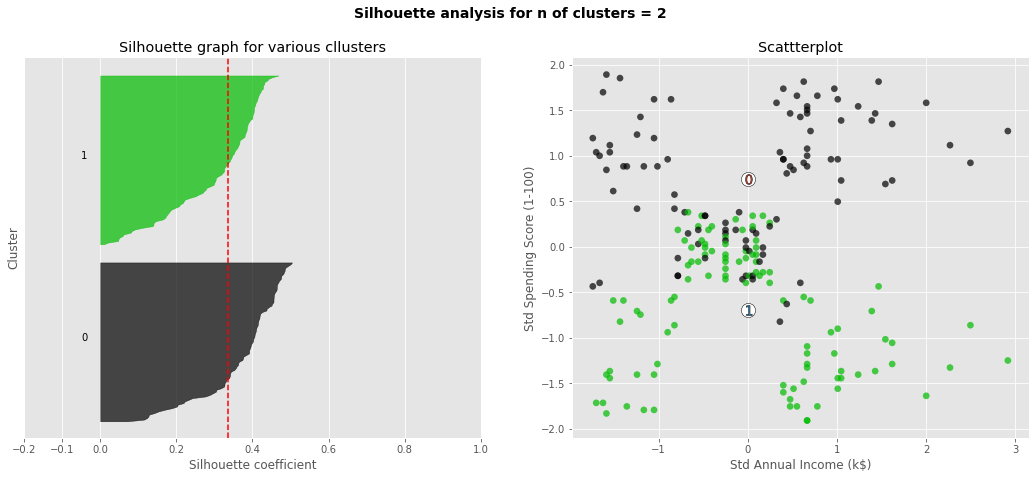

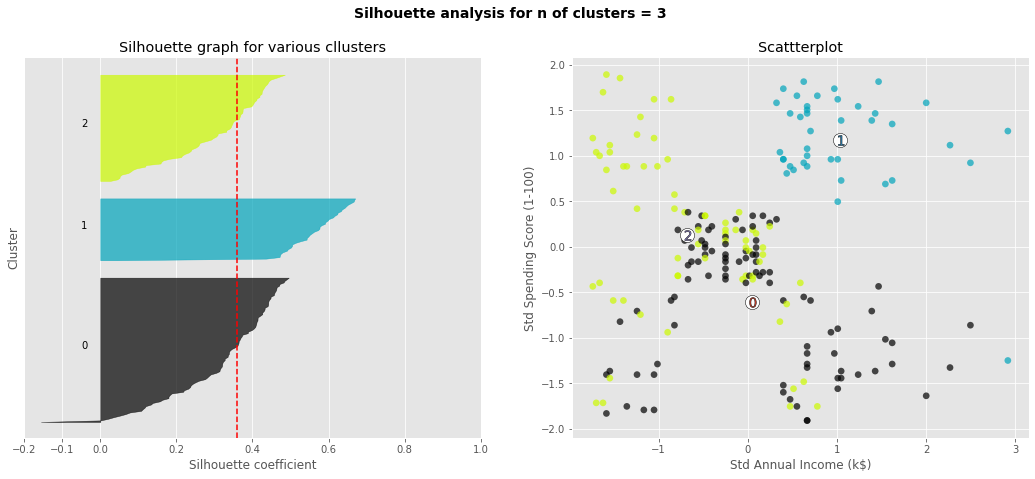

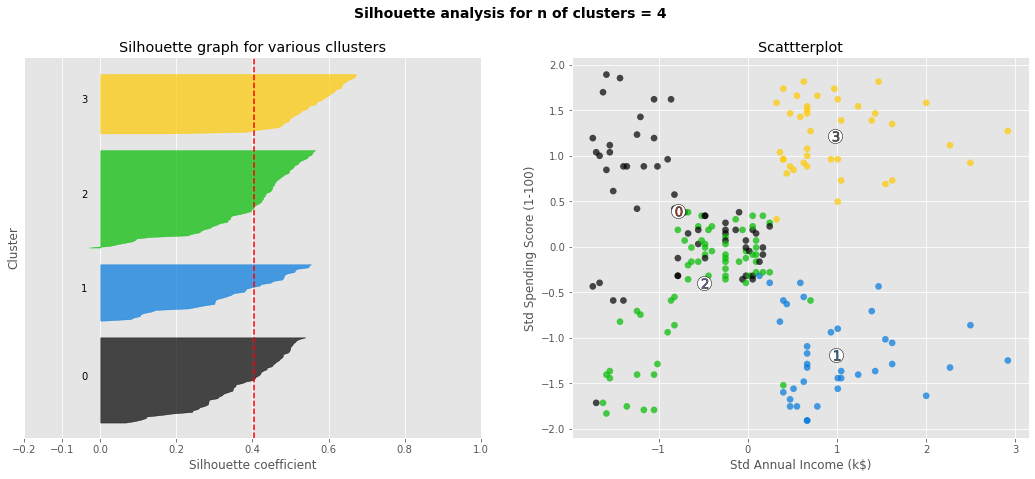

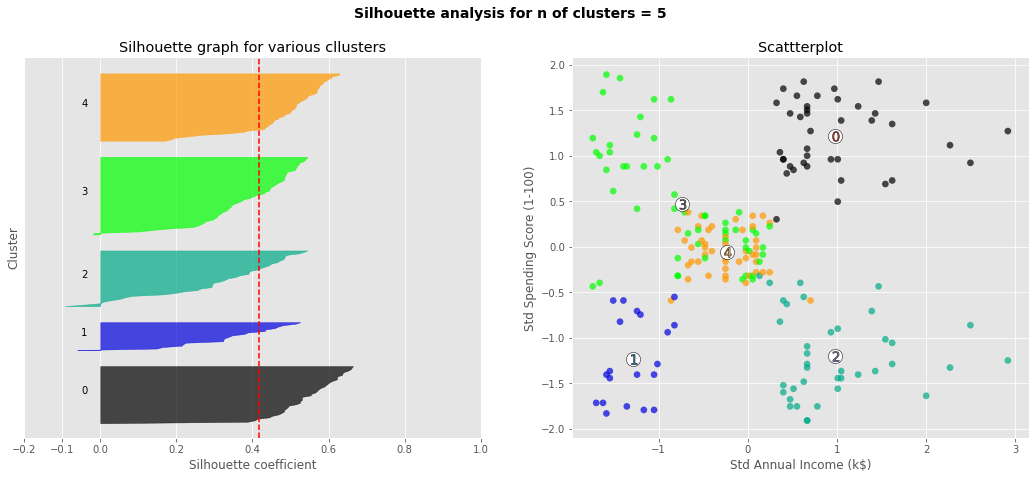

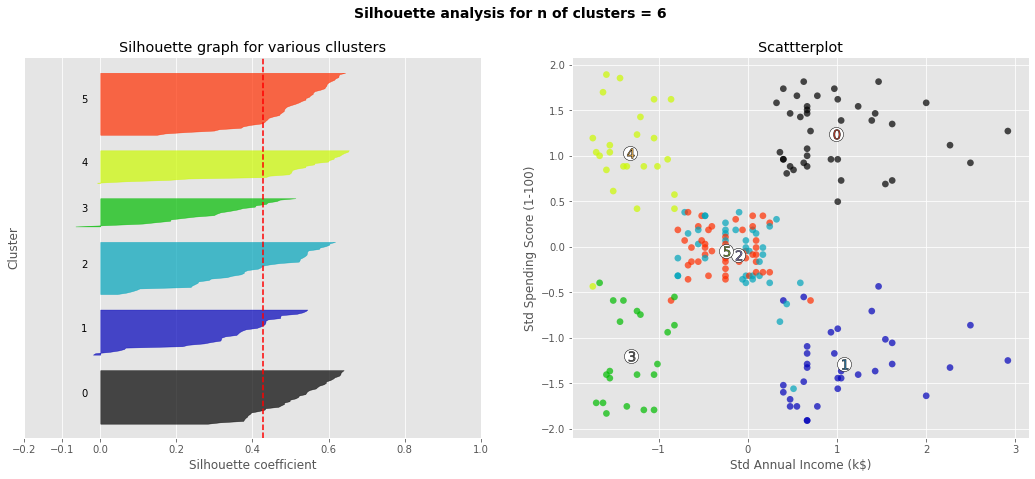

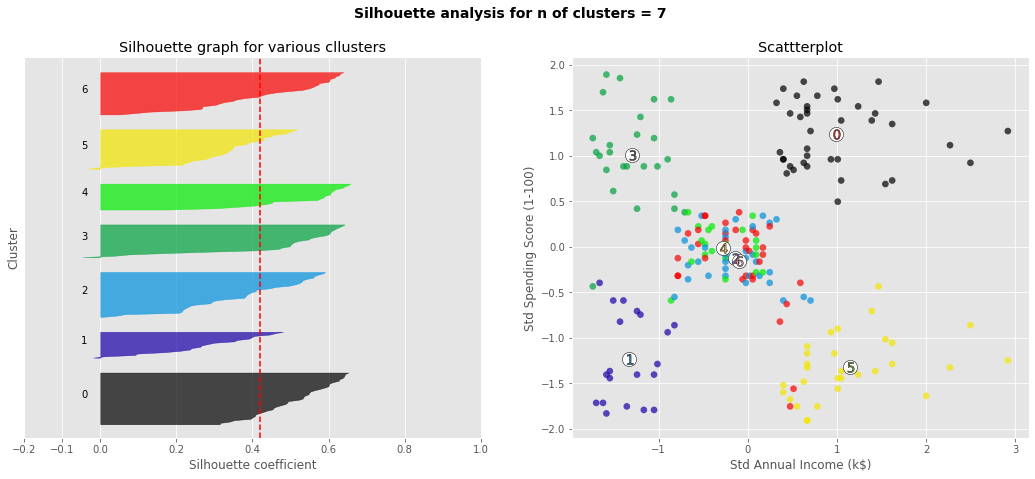

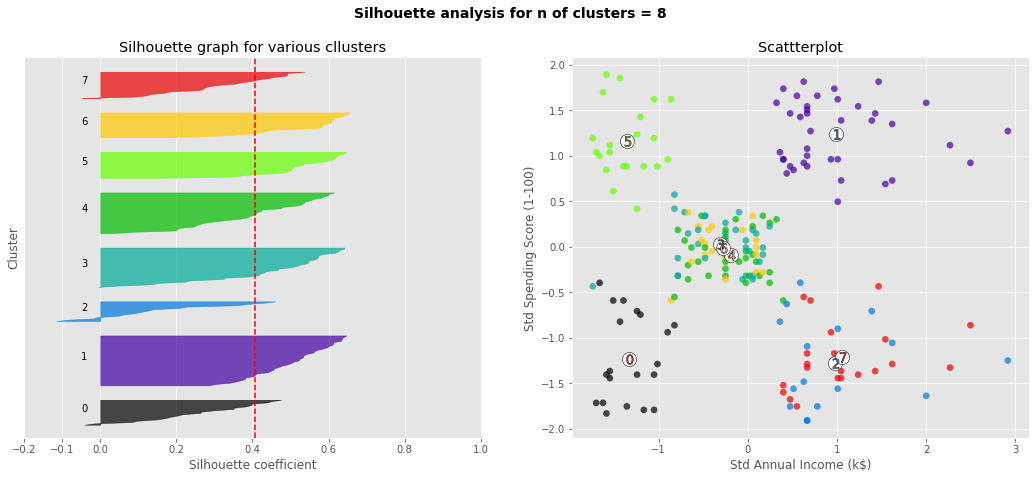

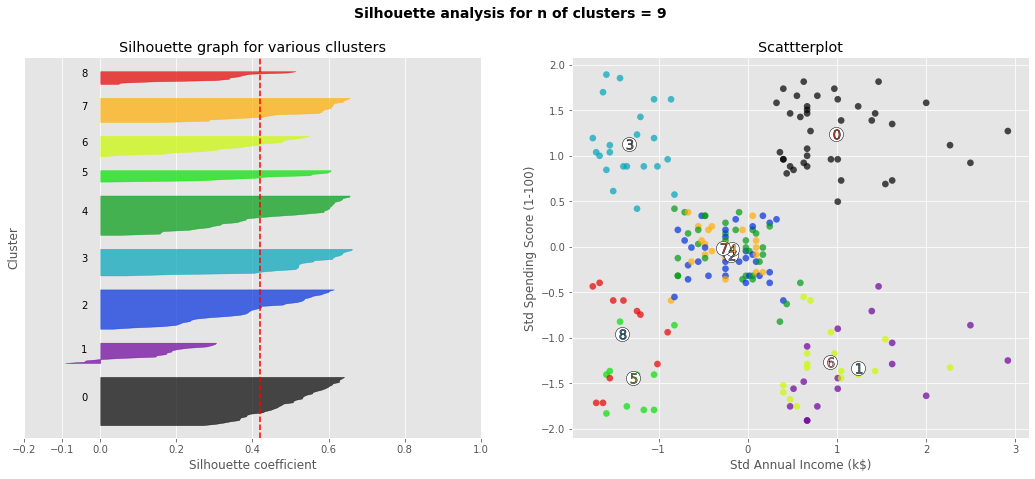

In [13]:
scores = []

n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

for n in n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

   
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df_std) + (n + 1) * 10])

    clusterer = KMeans(n_clusters = n, random_state=10)
    cluster_labels = clusterer.fit_predict(df_std)


    silhouette_avg = silhouette_score(df_std, cluster_labels)
    print("For n  number of clusters =", n,
          "Average silhouette score is: ", silhouette_avg)
    scores.append(silhouette_avg)

    sample_silhouette_values = silhouette_samples(df_std, cluster_labels)

    y_lower = 10
    for i in range(n):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("Silhouette graph for various cllusters")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n)
    ax2.scatter(df_std["Std Annual Income (k$)"], df_std["Std Spending Score (1-100)"], marker='.', s=180, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 1], centers[:, 2], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[1], c[2], marker='$%d$' % i, alpha=1,
                    s=100, edgecolor='k')

    ax2.set_title("Scattterplot")
    ax2.set_xlabel("Std Annual Income (k$)")
    ax2.set_ylabel("Std Spending Score (1-100)")

    plt.suptitle(("Silhouette analysis"
                  " for n of clusters = %d" % n),
                 fontsize=14, fontweight='bold')

plt.show()

In [14]:
df_scores = pd.DataFrame(scores).rename(columns = {0:"Coefficient"})
df_scores["Number of Clusters"] = [i for i in range(2,10)]
df_scores[["Number of Clusters","Coefficient"]]

,Number of Clusters,Coefficient
0,2,0.335472
1,3,0.358810
2,4,0.403958
3,5,0.416643
4,6,0.427428
5,7,0.418806
6,8,0.406948
7,9,0.420742


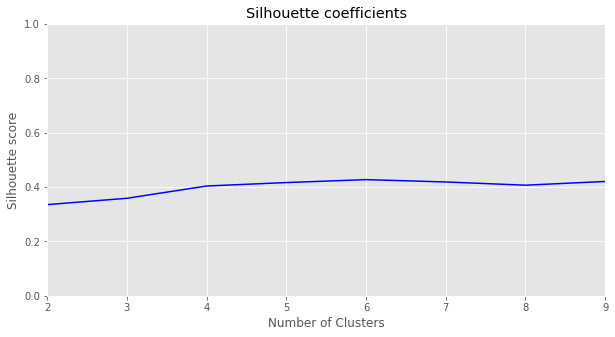

In [15]:
fig, ax = plt.subplots(figsize =(10,5))

ax.plot([i for i in range (2,10)], scores, c = "blue")
ax.set(xlabel = "Number of Clusters", ylabel = "Silhouette score", title = "Silhouette coefficients")

ax.set_xlim(2,9)
ax.set_ylim(0,1);

We see that the highest coefficient is for number of clusters 6 and it is 0.4274. For number of clusters 4 the coefficient is 0.4040. There is no big difference between these options. It is hard to tell which number to use. We see that we also have some negative coefficients at every number of clusters except in case of two clusters.

## K-means

In [16]:
kmeans = KMeans(n_clusters = 4)
kc = kmeans.fit_predict(df_std)

centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.rename(inplace = True, 
                 columns = {0:"Std Age", 
                            1:"Std Annual Income(k$)", 
                            2:"Std Spending Score (1-100)"})

df_cluster = pd.concat([df, pd.DataFrame(kc)], axis = 1).rename(columns = {0:"Cluster"})
df_cluster.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1
199,200,Male,30,137,83,2


We got our new column *Cluster* that represents in which cluster our obsevation is placed.

In [17]:
df_cluster.groupby("Cluster").count()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,57,57,57,57,57
1,38,38,38,38,38
2,40,40,40,40,40
3,65,65,65,65,65


We can see that most of our customers are placed in cluster 3 with 65 observations then 57 in 0, etc.

In [18]:
# position of our centroids
centroids.T

,0,1,2,3
Std Age,-0.962492,0.037205,-0.428806,1.086161
Std Annual Income(k$),-0.784763,0.990115,0.974847,-0.490565
Std Spending Score (1-100),0.392030,-1.188757,1.216085,-0.397174


## Kolmogorov smirnov normality test

In [19]:
print(" K-S test normality for 'Age' by clusters: \n")

for i in range (0,4):
    statistics = stats.kstest(df_cluster["Age"].values[df_cluster["Cluster"].values == i], 'norm')
    print(f"For cluster {i} statistic is: {statistics}")
   



print("\n K-S test normality for 'Annual Income (k$)' by clusters: \n")  

for i in range(0,4):
    statistics = stats.kstest(df_cluster["Annual Income (k$)"][df_cluster["Cluster"] == i], 'norm')
    print(f"For cluster {i} statistic is: {statistics}")
    

    
    
print("\n K-S test normality for 'Spending Score (1-100)' by clusters: \n")

for i in range(0,4):
    statistics = stats.kstest(df_cluster["Spending Score (1-100)"][df_cluster["Cluster"] == i], 'norm')
    print(f"For cluster {i} statistic is: {statistics}")

 K-S test normality for 'Age' by clusters: 

For cluster 0 statistic is: KstestResult(statistic=1.0, pvalue=0.0)
For cluster 1 statistic is: KstestResult(statistic=1.0, pvalue=0.0)
For cluster 2 statistic is: KstestResult(statistic=1.0, pvalue=0.0)
For cluster 3 statistic is: KstestResult(statistic=1.0, pvalue=0.0)

 K-S test normality for 'Annual Income (k$)' by clusters: 

For cluster 0 statistic is: KstestResult(statistic=1.0, pvalue=0.0)
For cluster 1 statistic is: KstestResult(statistic=1.0, pvalue=0.0)
For cluster 2 statistic is: KstestResult(statistic=1.0, pvalue=0.0)
For cluster 3 statistic is: KstestResult(statistic=1.0, pvalue=0.0)

 K-S test normality for 'Spending Score (1-100)' by clusters: 

For cluster 0 statistic is: KstestResult(statistic=0.9999999990134123, pvalue=0.0)
For cluster 1 statistic is: KstestResult(statistic=0.9473681344010596, pvalue=5.11073125027476e-49)
For cluster 2 statistic is: KstestResult(statistic=1.0, pvalue=0.0)
For cluster 3 statistic is: Kstest

We can see that our variables are not normaly distributed. To analyze if there is statisticly signigicant difference between our clusters we are going to use nonparametric test Kruskal Wallis because our variables are not normaly distributed

## Kruskal Wallis test

#### KW test for 'Age'

In [20]:
stats.kruskal(df_cluster["Age"][df_cluster["Cluster"] == 0],
              df_cluster["Age"][df_cluster["Cluster"] == 1],
              df_cluster["Age"][df_cluster["Cluster"] == 2],
              df_cluster["Age"][df_cluster["Cluster"] == 3])

KruskalResult(statistic=139.86171593195755, pvalue=4.048333596143139e-30)

P value is very low, we reject null hypothesis, and we conclude that there is statistically significant difference between clusters for 'Age'

#### KW test for 'Annual Income (k$)'

In [21]:
stats.kruskal(df_cluster["Annual Income (k$)"][df_cluster["Cluster"] == 0],
              df_cluster["Annual Income (k$)"][df_cluster["Cluster"] == 1],
              df_cluster["Annual Income (k$)"][df_cluster["Cluster"] == 2],
              df_cluster["Annual Income (k$)"][df_cluster["Cluster"] == 3])

KruskalResult(statistic=141.24371944181863, pvalue=2.0383719615135984e-30)

P value is again very low and we conclude that there is statistically significant difference between clusters for 'Annual Income (k$)'

#### KW test for 'Spending Score (1-100)'

In [22]:
stats.kruskal(df_cluster["Spending Score (1-100)"][df_cluster["Cluster"] == 0],
              df_cluster["Spending Score (1-100)"][df_cluster["Cluster"] == 1],
              df_cluster["Spending Score (1-100)"][df_cluster["Cluster"] == 2],
              df_cluster["Spending Score (1-100)"][df_cluster["Cluster"] == 3])

KruskalResult(statistic=132.0762341301666, pvalue=1.930252927153323e-28)

P value is again very low and we conclude that there is statistically significant difference between clusters for 'Spending Score(1-100)'

We saw that Kruskal Wallis test showed us clustering went well and we got a well formed clusters that differ one from each other, and that is what we want.

## Plotting

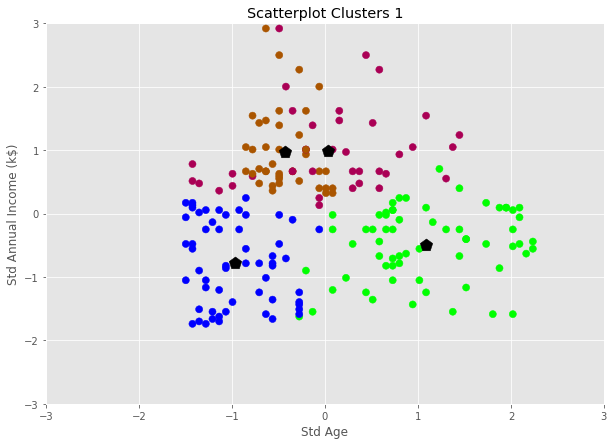

In [23]:
fig, ax = plt.subplots(figsize= (10,7))

ax.scatter(df_std["Std Age"], df_std["Std Annual Income (k$)"], c = kc, s = 50, cmap = "brg")
ax.scatter(centroids.T.iloc[0:1], centroids.T.iloc[1:2], marker ="p", s = 170, c = "black")

ax.set(title = "Scatterplot Clusters 1", 
       xlabel = "Std Age", 
       ylabel = "Std Annual Income (k$)")

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3);

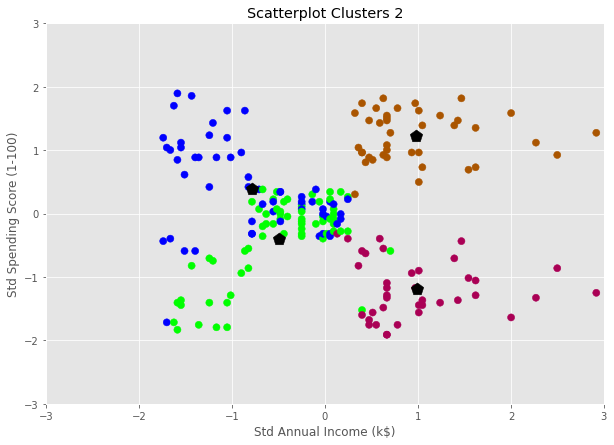

In [24]:
fig, ax = plt.subplots(figsize= (10,7))

ax.scatter(df_std["Std Annual Income (k$)"], df_std["Std Spending Score (1-100)"], c = kc, s = 50, cmap = "brg")
ax.scatter(centroids.T.iloc[1:2], centroids.T.iloc[2:3], marker ="p", s = 170, c = "black")

ax.set(title = "Scatterplot Clusters 2", 
       xlabel = "Std Annual Income (k$)", 
       ylabel = "Std Spending Score (1-100)")

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3);

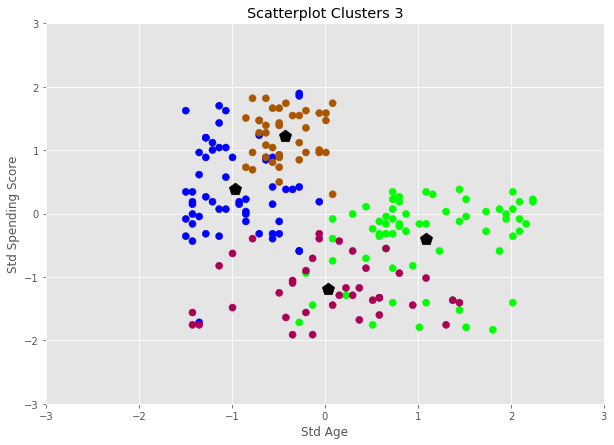

In [25]:
fig, ax = plt.subplots(figsize= (10,7))

ax.scatter(df_std["Std Age"], df_std["Std Spending Score (1-100)"], c = kc, s = 50, cmap = "brg")

ax.set(title = "Scatterplot Clusters 3", 
       xlabel = "Std Age", 
       ylabel = "Std Spending Score")

ax.scatter(centroids.T.iloc[0:1], centroids.T.iloc[2:3], marker ="p", s = 170, c = "black")

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3);

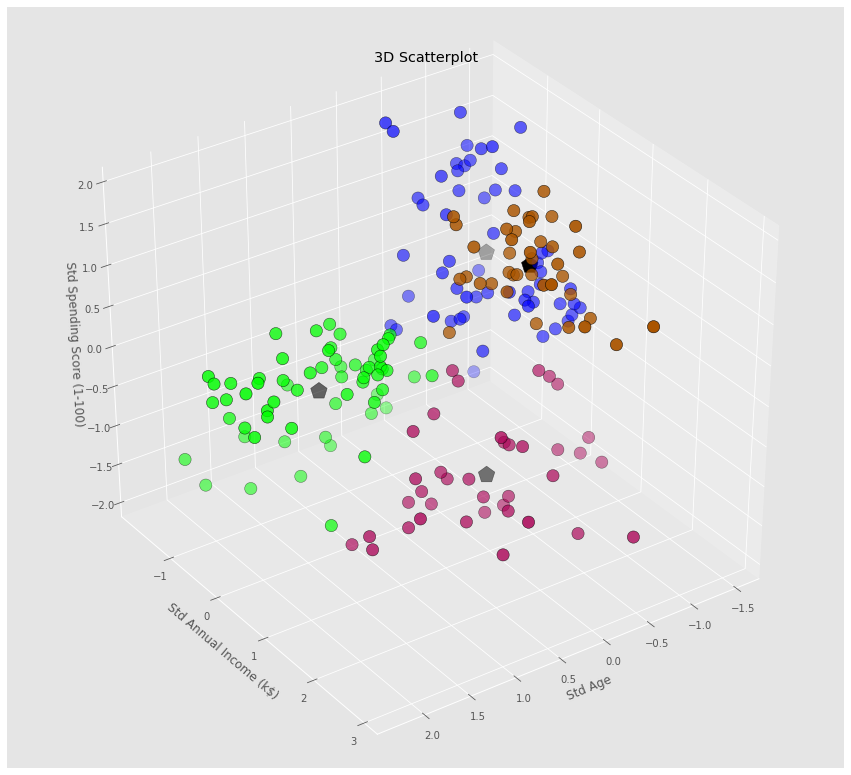

In [26]:
fig = plt.figure(figsize = (15,14))
ax = fig.add_subplot(111, projection='3d')

ax.set(title = "3D Scatterplot", 
       xlabel = "Std Age", 
       ylabel = "Std Annual Income (k$)", 
       zlabel = "Std Spending Score (1-100)")

x = df_std["Std Age"]
y = df_std["Std Annual Income (k$)"]
z = df_std["Std Spending Score (1-100)"]

ax.scatter(x,y,z, marker="o", c = kc, s=150, cmap="brg", edgecolors= "black")

ax.scatter(centroids["Std Age"], centroids["Std Annual Income(k$)"], centroids["Std Spending Score (1-100)"], 
           marker = "p", s = 300, c = "black")


ax.view_init(35,55)

From the graphs we can see our 4 clusters:
* Brown cluster consisting of young customers which have high values of spending score and high values of annual income
* Blue cluster consisting also of young customers with mid-high values of spending score, but low annual income
* Green cluster consisting of older clients with mid values of spending score and low-mid annual income
* Purple cluster consisting of persons with mid-high age, low spending score and high annual income

## Hierarchical clustering

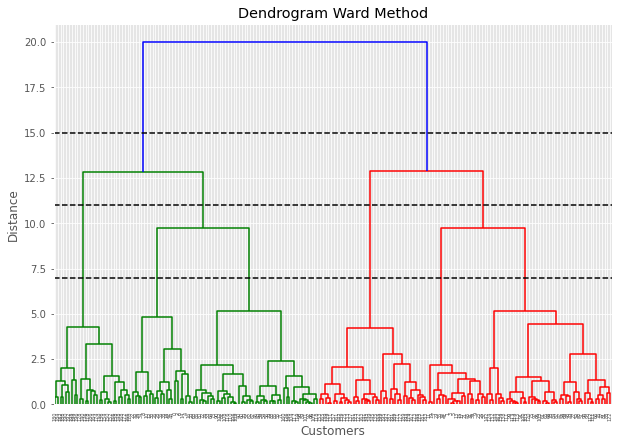

In [27]:
fig, ax = plt.subplots(figsize = (10,7))

dendrogram = sch.dendrogram(sch.linkage(df_std, method = "ward"))
ax.set(title = "Dendrogram Ward Method", xlabel = "Customers", ylabel = "Distance")

plt.axhline(15, c = "black", linestyle="--")
plt.axhline(11, c = "black", linestyle="--")
plt.axhline(7, c = "black", linestyle="--");

On the dendrogram are placed 3 horizontal lines. 
* First one cuts the dendrogram into 2 clusters, 
* second line cuts into 4 clusters and 
* third line cuts dendrogram into 6 clusters. 

Again it is hard to decide which one would be optimal number of clusters. We can see that the distance (wcss in ward method) rises at number of clusters 6 suddenly(third line). This indicates that we could have taken 6 as a number of clusters in our analysis. But also there is a big gap at other lines too.